In [13]:
import sys
import os

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)  # Add the project root to Python path

# Import reusable scripts
from scripts.data_loader import load_data  # Load dataset
from scripts.eda import summarize_data, plot_distributions, plot_categorical_distributions, plot_correlation_heatmap, plot_numeric_distributions  # EDA functions
from scripts.feature_engineering import extract_title, create_family_size  # Feature engineering


In [2]:
# 📌 Step 1: Load Data and Data Quality Assessment
df = load_data() 
summarize_data(df)

📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

📌 Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687


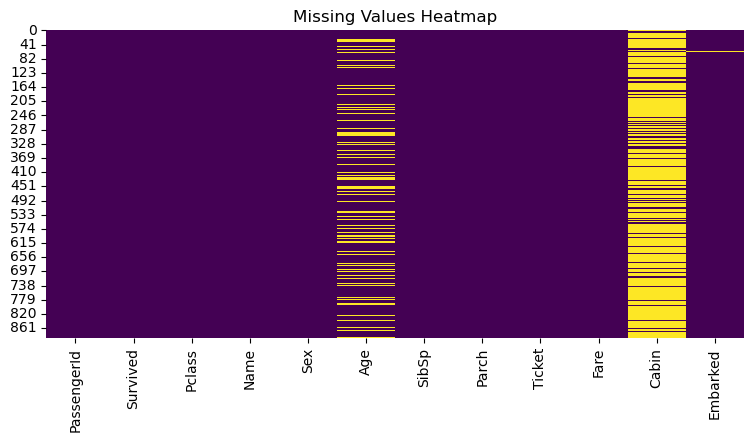

In [3]:
# Missing Values Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 4))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [4]:
# 📌 Step 2: Add new features
df = extract_title(df)
df = create_family_size(df)

<Figure size 1500x1000 with 0 Axes>

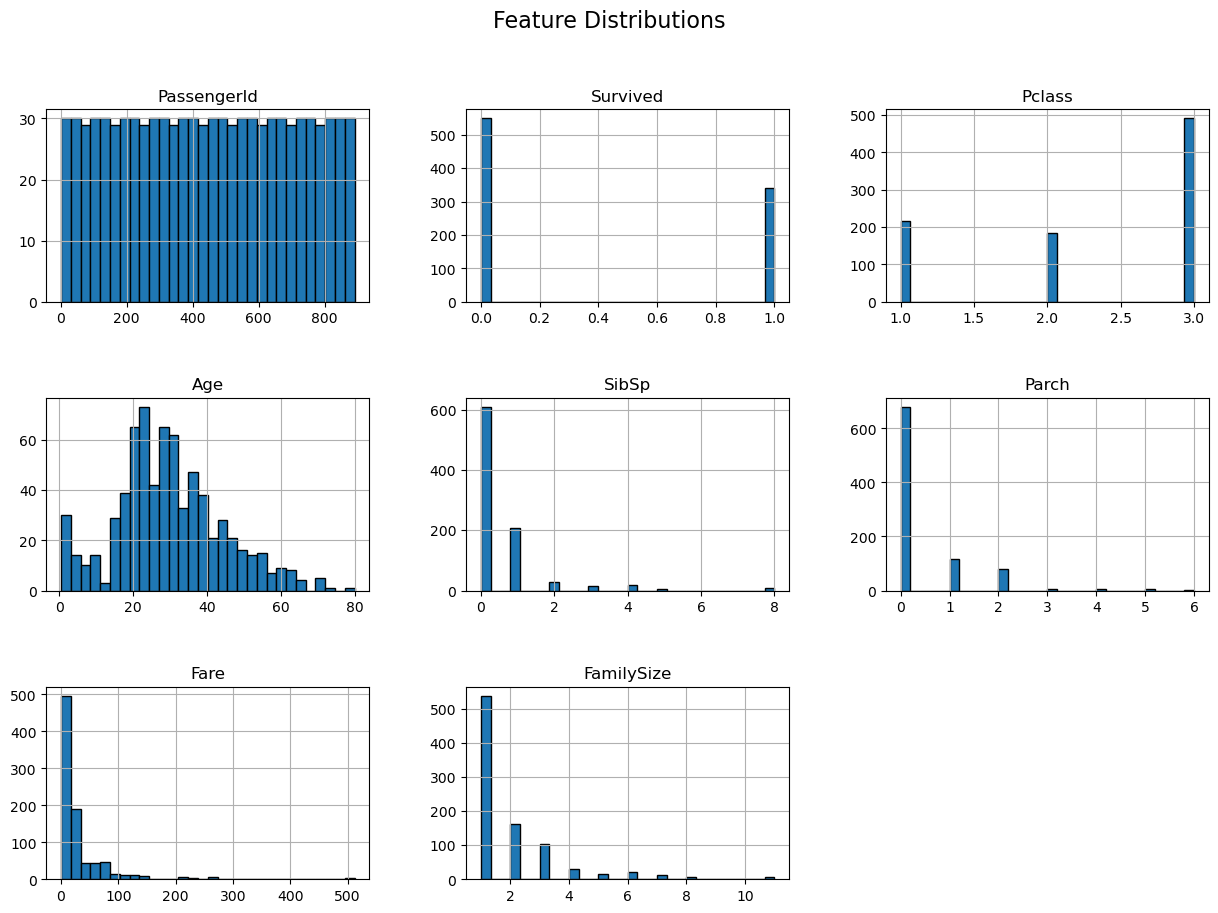

In [5]:
# 📌 Step 3: Numeric Feature Distributions
plot_distributions(df, layout="single")

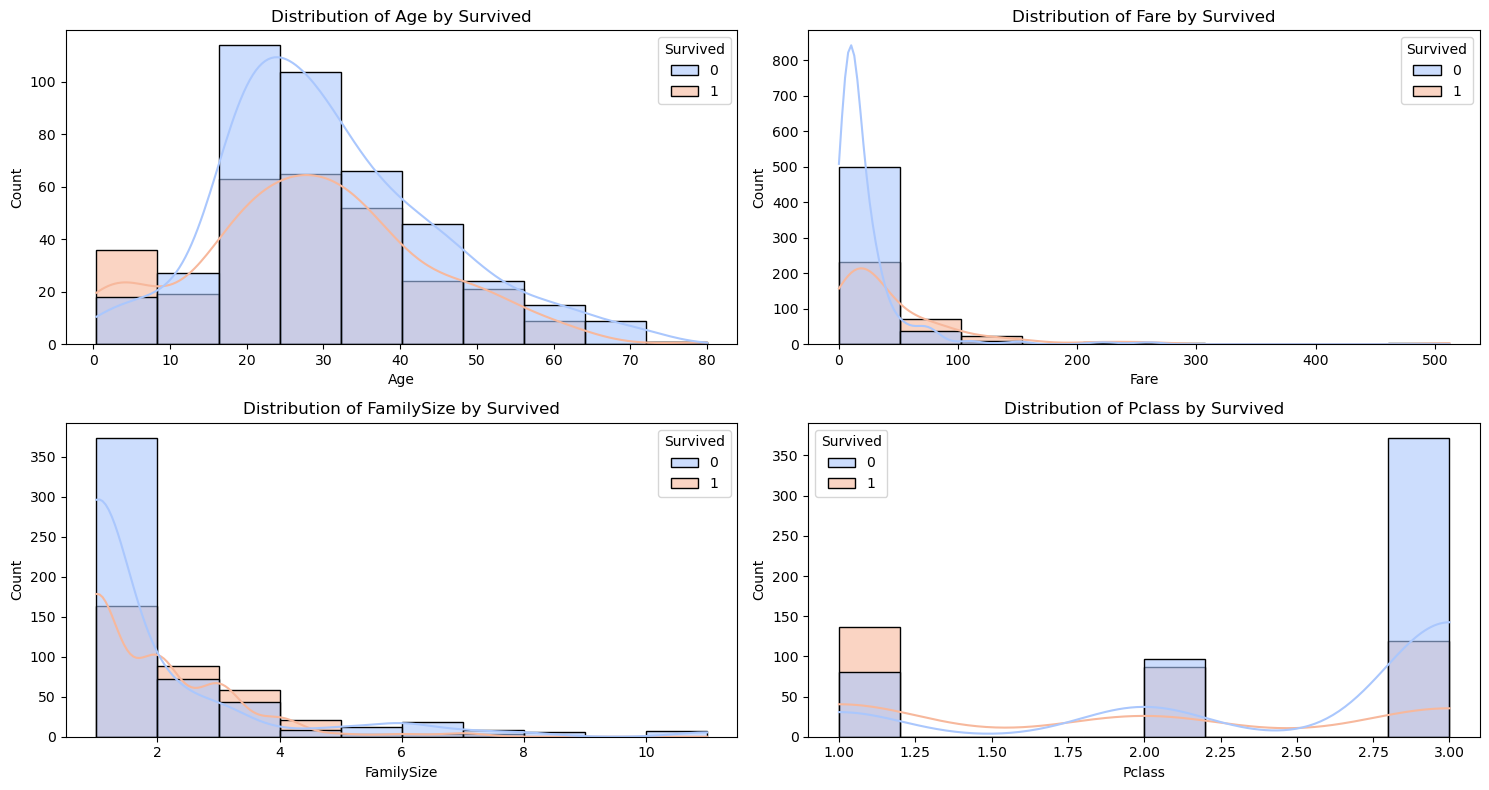

In [6]:
plot_numeric_distributions(df, layout="single", selected_columns=["Age", "Fare", "FamilySize", "Pclass"], hue_feature="Survived", bins=10)

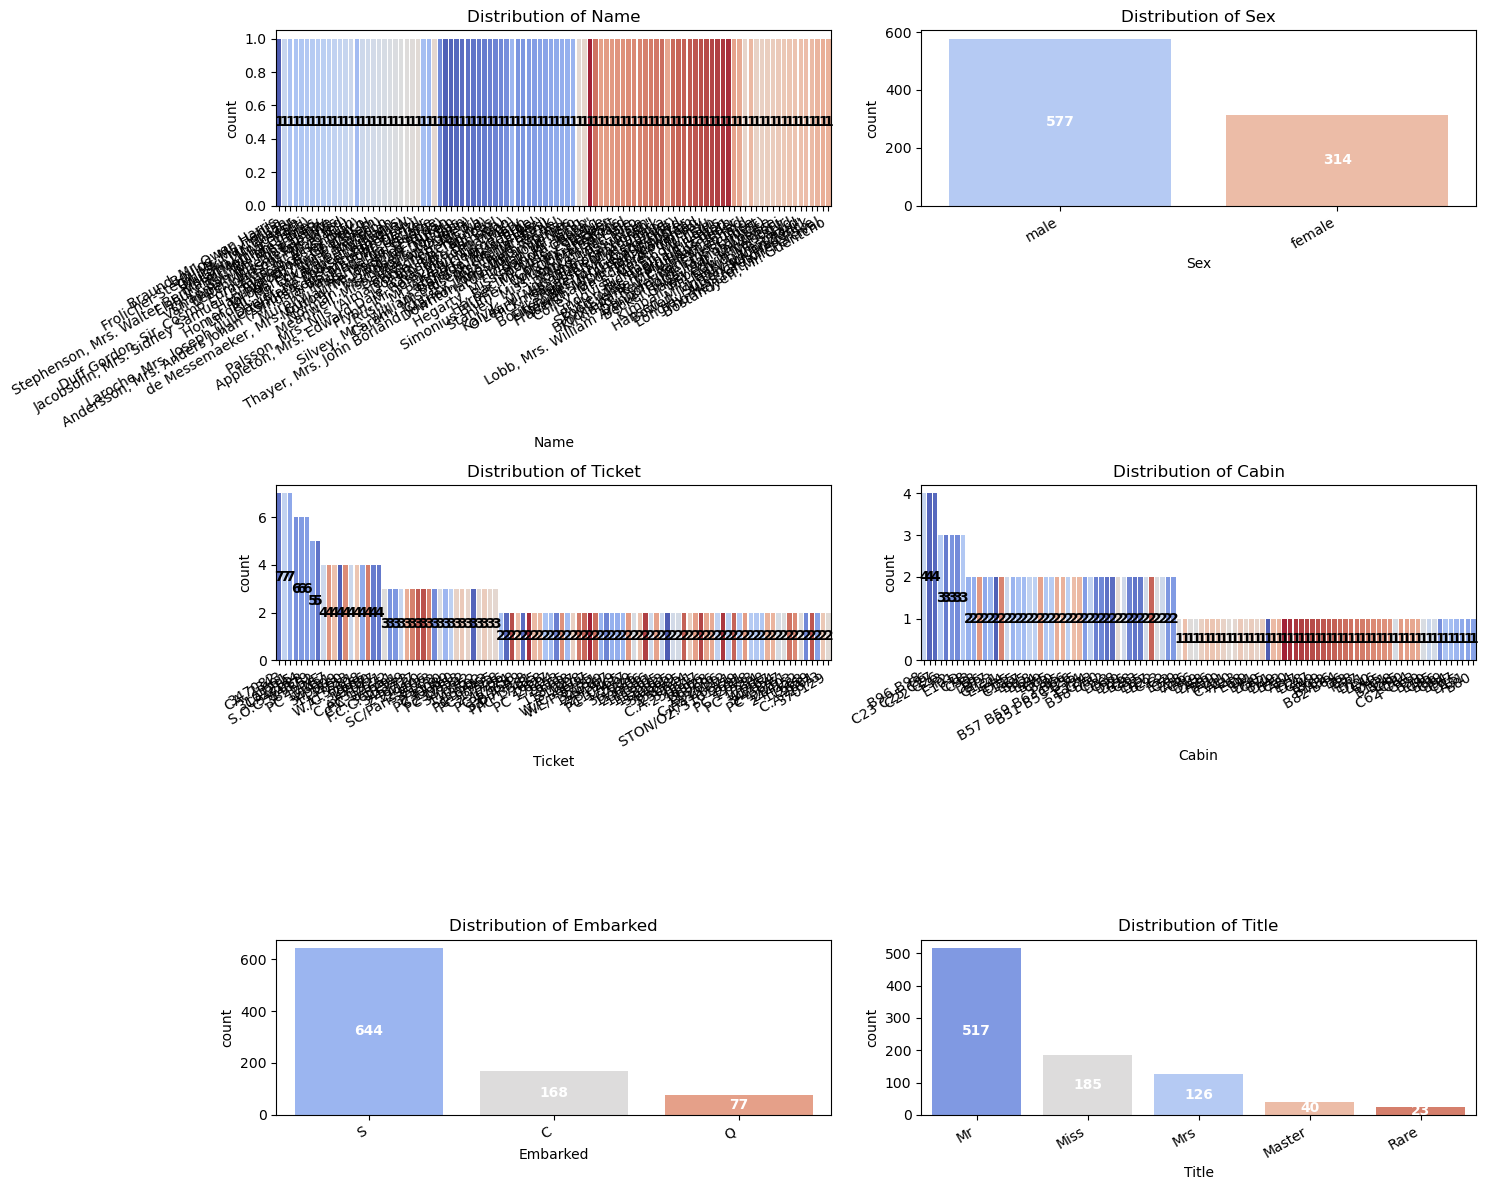

In [7]:
# 📌 Step 4: Categorical Feature Distributions
plot_categorical_distributions(df, layout="single", top_n=100)

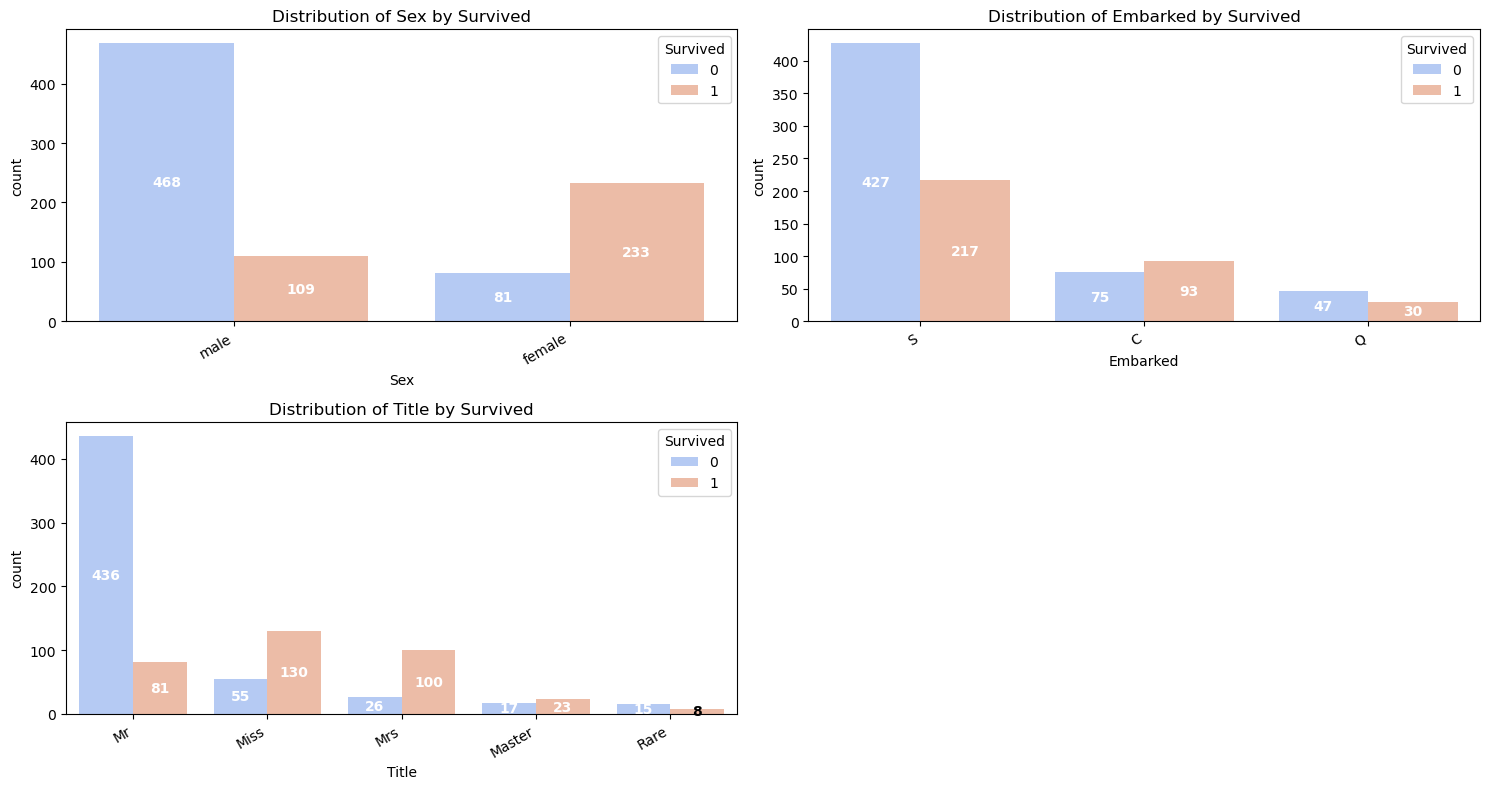

In [8]:
plot_categorical_distributions(df, selected_columns=["Sex", "Embarked", "Title"], hue_feature="Survived", layout="single")

In [9]:
# 📌 Step 5: Correlation Matrix
plot_correlation_heatmap(df, show_dataframe=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


In [10]:
plot_correlation_heatmap(df, include_categorical=True, show_dataframe=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Name,Sex,Ticket,Cabin,Embarked,Title
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143,-0.038559,0.042939,-0.056554,-0.035077,0.013083,0.078879
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,-0.057343,-0.543351,-0.164549,-0.254888,-0.163517,-0.071174
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997,0.052831,0.131900,0.319869,0.684121,0.157112,-0.181177
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914,0.062583,0.093254,-0.075934,-0.252331,-0.025252,0.508856
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712,-0.017230,-0.114631,0.079461,0.043593,0.066654,-0.209813
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111,-0.049105,-0.245489,0.020003,-0.028324,0.038322,-0.117587
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138,-0.049173,-0.182333,-0.013885,-0.503355,-0.221226,-0.013273
FamilySize,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000,-0.036309,-0.200988,0.064302,0.015644,0.064701,-0.202145
Name,-0.038559,-0.057343,0.052831,0.062583,-0.017230,-0.049105,-0.049173,-0.036309,1.000000,0.020314,0.047348,0.061959,-0.004557,0.005133
Sex,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-0.200988,0.020314,1.000000,0.059372,0.096681,0.104057,0.060299


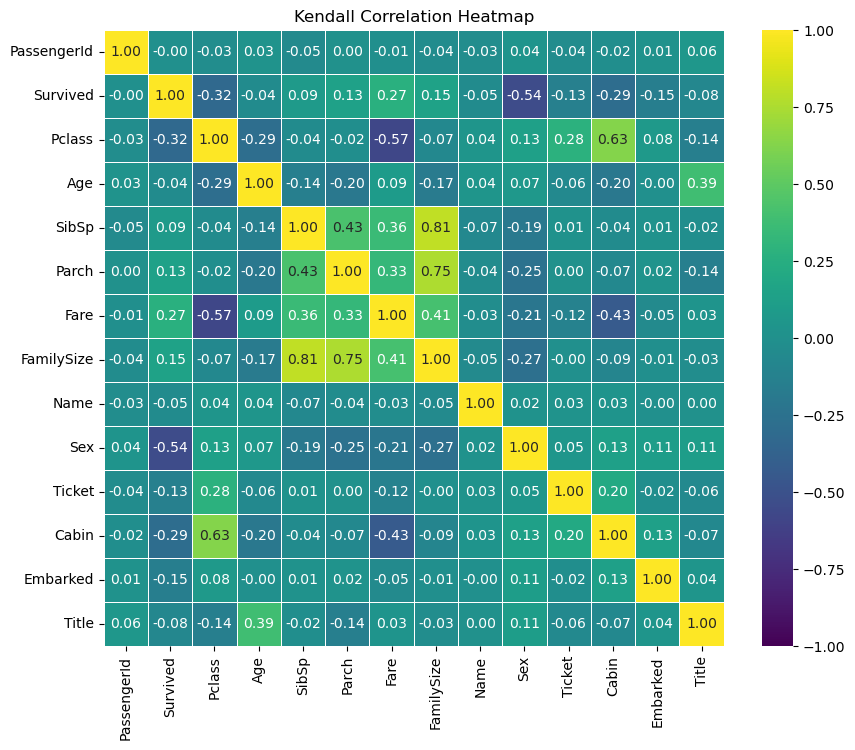

In [11]:
# Default Pearson Correlation Heatmap
#plot_correlation_heatmap(df)

# Spearman Correlation Heatmap
#plot_correlation_heatmap(df, method="spearman", figsize=(12, 10), annot=False)

# Kendall Correlation Heatmap with a different colormap
plot_correlation_heatmap(df, method="kendall", cmap="viridis", include_categorical=True)

In [20]:
# Save the dataset after EDA
processed_folder = "../data/processed"

df.to_csv(f"{processed_folder}/train_eda.csv", index=False)

print(f"Processed dataset saved at {processed_folder}/train_eda.csv")

Processed dataset saved at ../data/processed/train_eda.csv
